# Create Maps

Maps are created by this notebook

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pyproj

In [2]:
outPath = f"output{os.sep}"
dataPath = f"datasets{os.sep}"
wgs84 = pyproj.CRS.from_string('WGS84')

In [3]:
def lp(v):
    print(f"[{datetime.now()}] {v}")

lp("Starting...")

[2025-03-28 16:58:37.776872] Starting...


In [4]:
lp(f"outPath:  {outPath}")
lp(f"dataPath:  {dataPath}")

[2025-03-28 16:58:37.780989] outPath:  output/
[2025-03-28 16:58:37.781131] dataPath:  datasets/


In [5]:
lp("Loading 100m lidar data")
data100m = gpd.read_parquet(f"{outPath}AggregateLidarData_100m.parquet")
bounds100m = data100m.total_bounds
lp("Loading 10m subset lidar data")
data10m = gpd.read_parquet(f"{outPath}AggregateLidarData_SomeHoods_10m.parquet")
bounds10m = data10m.total_bounds

[2025-03-28 16:58:37.785144] Loading 100m lidar data
[2025-03-28 16:58:37.860373] Loading 10m subset lidar data


In [6]:
crs = data100m.crs
lp(f"CRS:  {crs.name}")

[2025-03-28 16:58:38.268775] CRS:  NAD83(2011) / UTM zone 15N + NAVD88 height - Geoid18 (metres)


In [7]:
lp("Loading neighborhoos data")
neighborhoodsDf = gpd.read_file(f"{dataPath}Neighborhoods.geojson").to_crs(crs)

[2025-03-28 16:58:38.273809] Loading neighborhoos data


In [8]:
lp("Loading water")
waterDf = gpd.read_file(f"{dataPath}WATER2.SHP").set_crs(wgs84).to_crs(crs)

[2025-03-28 16:58:38.331794] Loading water


/home/g/.local/share/virtualenvs/NewOrleansElevation-1OW7m-mh/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: organizePolygons() received an unexpected geometry.  Either a polygon with interior rings, or a polygon with less than 4 points, or a non-Polygon geometry.  Return arguments as a collection.
  return ogr_read(
/home/g/.local/share/virtualenvs/NewOrleansElevation-1OW7m-mh/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 3 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/NewOrleansElevation-1OW7m-mh/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geometry of polygon of fid 4 cannot be translated to Simple Geometry. All polygons will be contained in a multipolygon.
  return ogr_read(
/home/g/.local/share/virtualenvs/NewOrleansElevation-1OW7m-mh/lib/python3.11/site-packages/pyogrio/raw.py:198: RuntimeWarning: Geom

<Axes: >

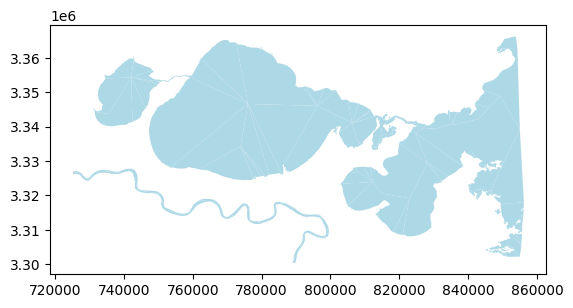

In [9]:
waterDf.plot(color='lightblue')

In [10]:
def processLidar(df):
    df['AltitudeMeters'] = (df['AltitudeTotal'] / df['Total']) / 1000.0
    df['Altitude'] = df['AltitudeMeters'] / 3.28084
    df['WaterPerc'] = df['WaterTotal'] / df['Total'] * 100.0
    df['IsWater'] = df['WaterPerc'] > 50.0

    return df

lp("Processing 100m lidar")
data100m = processLidar(data100m)
lp("Processing 10m Lidar")
data10m = processLidar(data10m)

[2025-03-28 16:58:38.500276] Processing 100m lidar
[2025-03-28 16:58:38.503956] Processing 10m Lidar


Text(0.5, 0.98, 'Data set coverage in blue, lidar point count == 0 in black')

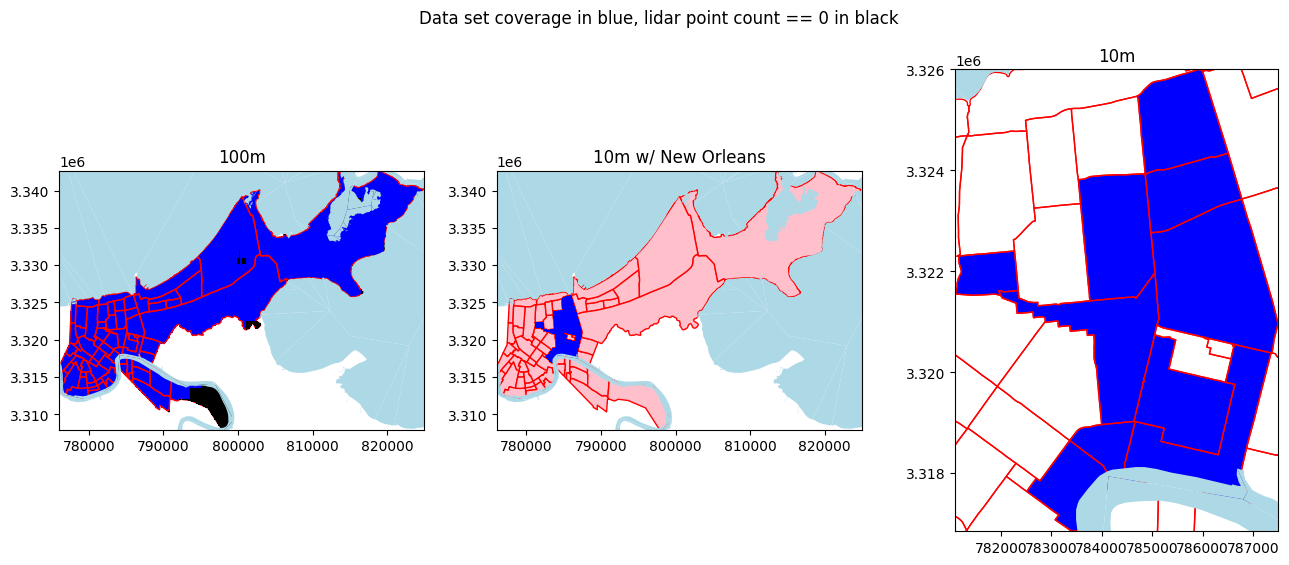

In [11]:
#Sanity checks

fig, ax = plt.subplots(figsize=(16,6), nrows=1,ncols=3)
data100m[data100m['Total'] != 0].plot(ax=ax[0], color='blue', label='Data points')
neighborhoodsDf.plot(ax=ax[0],color=(0,0,0,0), edgecolor='red',label='No Processing')
data100m[data100m['Total'] == 0].plot(ax=ax[0], color='black', label='No points')
waterDf.plot(ax=ax[0], color='lightblue', label='water')
ax[0].set_xlim((bounds100m[0], bounds100m[2]))
ax[0].set_ylim((bounds100m[1], bounds100m[3]))
ax[0].set_title("100m")

neighborhoodsDf.plot(ax=ax[1],color='pink',label='No Processing',edgecolor='red')
data10m[data10m['Total'] != 0].plot(ax=ax[1], color='blue', label='Data points')
data10m[data10m['Total'] == 0].plot(ax=ax[1], color='black', label='No points')
waterDf.plot(ax=ax[1], color='lightblue', label='water')

ax[1].set_xlim((bounds100m[0], bounds100m[2]))
ax[1].set_ylim((bounds100m[1], bounds100m[3]))
ax[1].set_title("10m w/ New Orleans")

data10m[data10m['Total'] != 0].plot(ax=ax[2], color='blue', label='Data points')
neighborhoodsDf.plot(ax=ax[2],color=(0,0,0,0), edgecolor='red',label='No Processing')
data10m[data10m['Total'] == 0].plot(ax=ax[2], color='black', label='No points')
waterDf.plot(ax=ax[2], color='lightblue', label='water')

ax[2].set_xlim((bounds10m[0], bounds10m[2]))
ax[2].set_ylim((bounds10m[1], bounds10m[3]))
ax[2].set_title("10m")


fig.suptitle("Data set coverage in blue, lidar point count == 0 in black")

(3316851.0, 3326001.0)

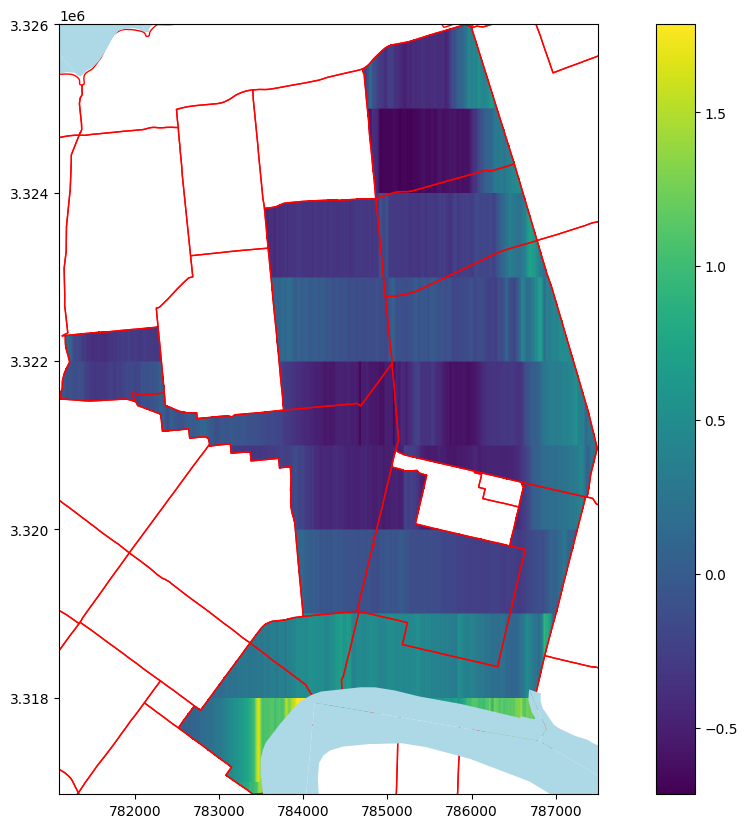

In [12]:
ax = data10m.plot(column='Altitude', legend=True, figsize=(15,10))
neighborhoodsDf.plot(ax=ax,color=(0,0,0,0), edgecolor='red',label='No Processing')
waterDf.plot(ax=ax, color='lightblue', label='water')
ax.set_xlim((bounds10m[0], bounds10m[2]))
ax.set_ylim((bounds10m[1], bounds10m[3]))

In [ ]:
ax = data100m.plot(column='Altitude', legend=True, figsize=(15,10))
neighborhoodsDf.plot(ax=ax,color=(0,0,0,0), edgecolor='red',label='No Processing')
waterDf.plot(ax=ax, color='lightblue', label='water')
ax.set_xlim((bounds100m[0], bounds100m[2]))
ax.set_ylim((bounds100m[1], bounds100m[3]))